<a href="https://colab.research.google.com/github/MattiaPOLI/DR14/blob/master/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!rm -rf DR14
!git clone https://github.com/MattiaPOLI/DR14.git

Cloning into 'DR14'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 315 (delta 24), reused 0 (delta 0), pack-reused 272
Receiving objects: 100% (315/315), 6.48 MiB | 21.06 MiB/s, done.
Resolving deltas: 100% (168/168), done.


In [0]:
from DR14 import CommonTools
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.exceptions import DataConversionWarning
from sklearn.model_selection import train_test_split
import warnings
import IPython
import pandas as pd
import numpy as np
import io

X, y = CommonTools.get_raw_dataset()
trainSet, test, labelTrainSet, labelTest = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 40)
#numberTrees = [50, 100, 200, 300, 350, 400, 500]
#numberFeatures = [2, 3, 4, 5]
#depth = [2, 5, 10, 20, 50]

#bestOob, bestDepth, bestFeat, bestEstim = 0.0, 0, 0, 0

#for i in range(len(numberTrees)):
#  for j in range(len(depth)):
#    for z in range(len(numberFeatures)):
#      RFC = RandomForestClassifier(n_estimators = numberTrees[i], max_depth = depth[j], random_state=0, oob_score = True,
#                                max_features = numberFeatures[z], bootstrap = True)
#      RFC.fit(trainSet, labelTrainSet)
#      if RFC.oob_score_ > bestOob:
#        bestOob, bestDepth, bestFeat, bestEstim = RFC.oob_score_, depth[j], numberFeatures[z], numberTrees[i] 
#        
#print("Best solution obtained at: %d maxDepth, %d numbFeatures, %d numbEstimators - all features selected" % (bestDepth, bestFeat, bestEstim))
#print("OOB score: %f" % (bestOob))

###################
#Best solution obtained at: 50 maxDepth, 4 numbFeatures, 50 numbEstimators - all features selected)
#OOB score: 0.989143

In [16]:
clf = RandomForestClassifier(n_estimators = 50, max_depth = 50, random_state=0, oob_score = True, max_features = 4, bootstrap = True)
clf.fit(trainSet, labelTrainSet)
accuracy = clf.score(test, labelTest)
print("The accuracy oh this model is: %.02f" % (accuracy))
labelPredicted = clf.predict(test)
CommonTools.confusion_matrix_(labelTest, labelPredicted)

The accuracy oh this model is: 0.99


In [0]:
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
importances = np.zeros(shape = (X.shape[1]))
kf = KFold(n_splits = 10, random_state = 42)
for train, test in kf.split(X, y):
  XStandard = StandardScaler().fit_transform(X) 
  clf.fit(XStandard, y)
  importances = importances + clf.feature_importances_
importances = importances / kf.get_n_splits()
columns = ["objid", "ra", "dec", "u", "g", "r", "i", "z", "run", "rerun", "camcol", "field", "specobjid", "redshift", "plate", "mjd", "fiberid"]
featureWeights = {columns[i]: importances[i] for i in range(len(importances))}

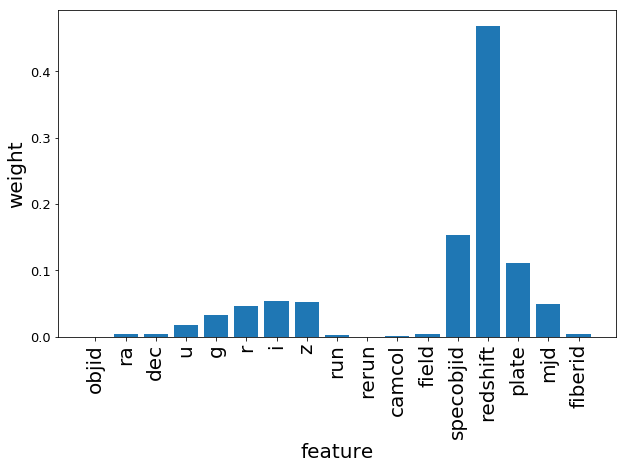

In [31]:
import matplotlib.pyplot as py

r1 = np.arange(len(importances))
py.figure(figsize=(10,6))
py.bar(r1, importances)
py.xlabel("feature", size = 20)
py.ylabel("weight", size = 20)
py.xticks([r for r in range(len(importances))], columns, size = 20, rotation = 90)
py.yticks(size = 13)
py.show()